In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pybaseball import lahman
lahman.download_lahman()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

In [2]:
prices = pd.read_csv("total_price_stats.csv")
prices = prices.rename(columns={"Unnamed: 0":"days"})

In [3]:
prices.columns = prices.columns.str.strip().str.lower().str.replace(' ',
'_').str.replace('(', '').str.replace(')', '')
prices
differences = prices.buy_now_price.diff()
differences

,days,date,buy_now_price,sell_now_price,player
0,0,4/22,284000,270949,Mike Trout
1,1,4/21,291499,277104,Mike Trout
2,2,4/20,290000,279699,Mike Trout
3,3,4/19,291999,281006,Mike Trout
4,4,4/18,298800,281000,Mike Trout
...,...,...,...,...,...
1219,31,3/22,15997,14200,Jose Altuve
1220,32,3/21,15900,14106,Jose Altuve
1221,33,3/20,16855,14601,Jose Altuve
1222,34,3/19,18450,15609,Jose Altuve


0          NaN
1       7499.0
2      -1499.0
3       1999.0
4       6801.0
         ...  
1219    -335.0
1220     -97.0
1221     955.0
1222    1595.0
1223   -1784.0
Name: buy_now_price, Length: 1224, dtype: float64

In [4]:
prices['Price_Differences'] = differences * -1
prices = prices[prices.date != '4/22']
prices

,days,date,buy_now_price,sell_now_price,player,Price_Differences
1,1,4/21,291499,277104,Mike Trout,-7499.0
2,2,4/20,290000,279699,Mike Trout,1499.0
3,3,4/19,291999,281006,Mike Trout,-1999.0
4,4,4/18,298800,281000,Mike Trout,-6801.0
5,5,4/17,284925,274052,Mike Trout,13875.0
...,...,...,...,...,...,...
1219,31,3/22,15997,14200,Jose Altuve,335.0
1220,32,3/21,15900,14106,Jose Altuve,97.0
1221,33,3/20,16855,14601,Jose Altuve,-955.0
1222,34,3/19,18450,15609,Jose Altuve,-1595.0


In [5]:
april21 = prices.loc[prices['date']=='4/21']
april20 = prices.loc[prices['date']=='4/20']
april19 = prices.loc[prices['date']=='4/19']
april18 = prices.loc[prices['date']=='4/18']
april17 = prices.loc[prices['date']=='4/17']
april16 = prices.loc[prices['date']=='4/16']
april15 = prices.loc[prices['date']=='4/15']
april14 = prices.loc[prices['date']=='4/14']
april13 = prices.loc[prices['date']=='4/13']
april12 = prices.loc[prices['date']=='4/12']
april11 = prices.loc[prices['date']=='4/11']
april10 = prices.loc[prices['date']=='4/10']
april09 = prices.loc[prices['date']=='4/09']
april08 = prices.loc[prices['date']=='4/08']
april07 = prices.loc[prices['date']=='4/07']
april06 = prices.loc[prices['date']=='4/06']
april05 = prices.loc[prices['date']=='4/05']
april04 = prices.loc[prices['date']=='4/04']
april03 = prices.loc[prices['date']=='4/03']
april02 = prices.loc[prices['date']=='4/02']
april01 = prices.loc[prices['date']=='4/01']
march31 = prices.loc[prices['date']=='3/31']
march30 = prices.loc[prices['date']=='3/30']
march29 = prices.loc[prices['date']=='3/29']
march28 = prices.loc[prices['date']=='3/28']
march27 = prices.loc[prices['date']=='3/27']
march26 = prices.loc[prices['date']=='3/26']
march25 = prices.loc[prices['date']=='3/25']
march24 = prices.loc[prices['date']=='3/24']
march23 = prices.loc[prices['date']=='3/23']
march22 = prices.loc[prices['date']=='3/22']
march21 = prices.loc[prices['date']=='3/21']
march20 = prices.loc[prices['date']=='3/20']
march19 = prices.loc[prices['date']=='3/19']
march18 = prices.loc[prices['date']=='3/18']

In [6]:
trout = prices.loc[prices['player']=='Mike Trout']
scherzer = prices.loc[prices['player']=='Max Scherzer']
degrom = prices.loc[prices['player']=='Jacob deGrom']
arenado = prices.loc[prices['player']=='Nolan Arenado']
cole = prices.loc[prices['player']=='Gerrit Cole']
verlander = prices.loc[prices['player']=='Justin Verlander']
bellinger = prices.loc[prices['player']=='Cody Bellinger']
betts = prices.loc[prices['player']=='Mookie Betts']
acuna = prices.loc[prices['player']=='Ronald Acuna Jr']
yelich = prices.loc[prices['player']=='Christian Yelich']
rendon = prices.loc[prices['player']=='Anthony Rendon']
sale = prices.loc[prices['player']=='Chris Sale']
judge = prices.loc[prices['player']=='Aaron Judge']
hader = prices.loc[prices['player']=='Josh Hader']
strasburg = prices.loc[prices['player']=='Stephen Strausburg']
lindor = prices.loc[prices['player']=='Francisco Lindor']
bregman = prices.loc[prices['player']=='Alex Bregman']
freeman = prices.loc[prices['player']=='Freddie Freeman']
yates = prices.loc[prices['player']=='Kirby Yates']
marte = prices.loc[prices['player']=='Ketel Marte']
baez = prices.loc[prices['player']=='Javier Baez']
buehler = prices.loc[prices['player']=='Walker Buehler']
alonso = prices.loc[prices['player']=='Pete Alonso']
chapman = prices.loc[prices['player']=='Alrodis Chapman']
morton = prices.loc[prices['player']=='Charlie Morton']
ramirez = prices.loc[prices['player']=='Jose Ramirez']
chapman = prices.loc[prices['player']=='Matt Chapman']
flaherty = prices.loc[prices['player']=='Jack Flaherty']
realmuto = prices.loc[prices['player']=='JT Realmuto']
harper = prices.loc[prices['player']=='Bryce Harper']
story = prices.loc[prices['player']=='Trevor Story']
kershaw = prices.loc[prices['player']=='Clayton Kershaw']
springer = prices.loc[prices['player']=='George Springer']
altuve = prices.loc[prices['player']=='Jose Altuve']

<IPython.core.display.Javascript object>


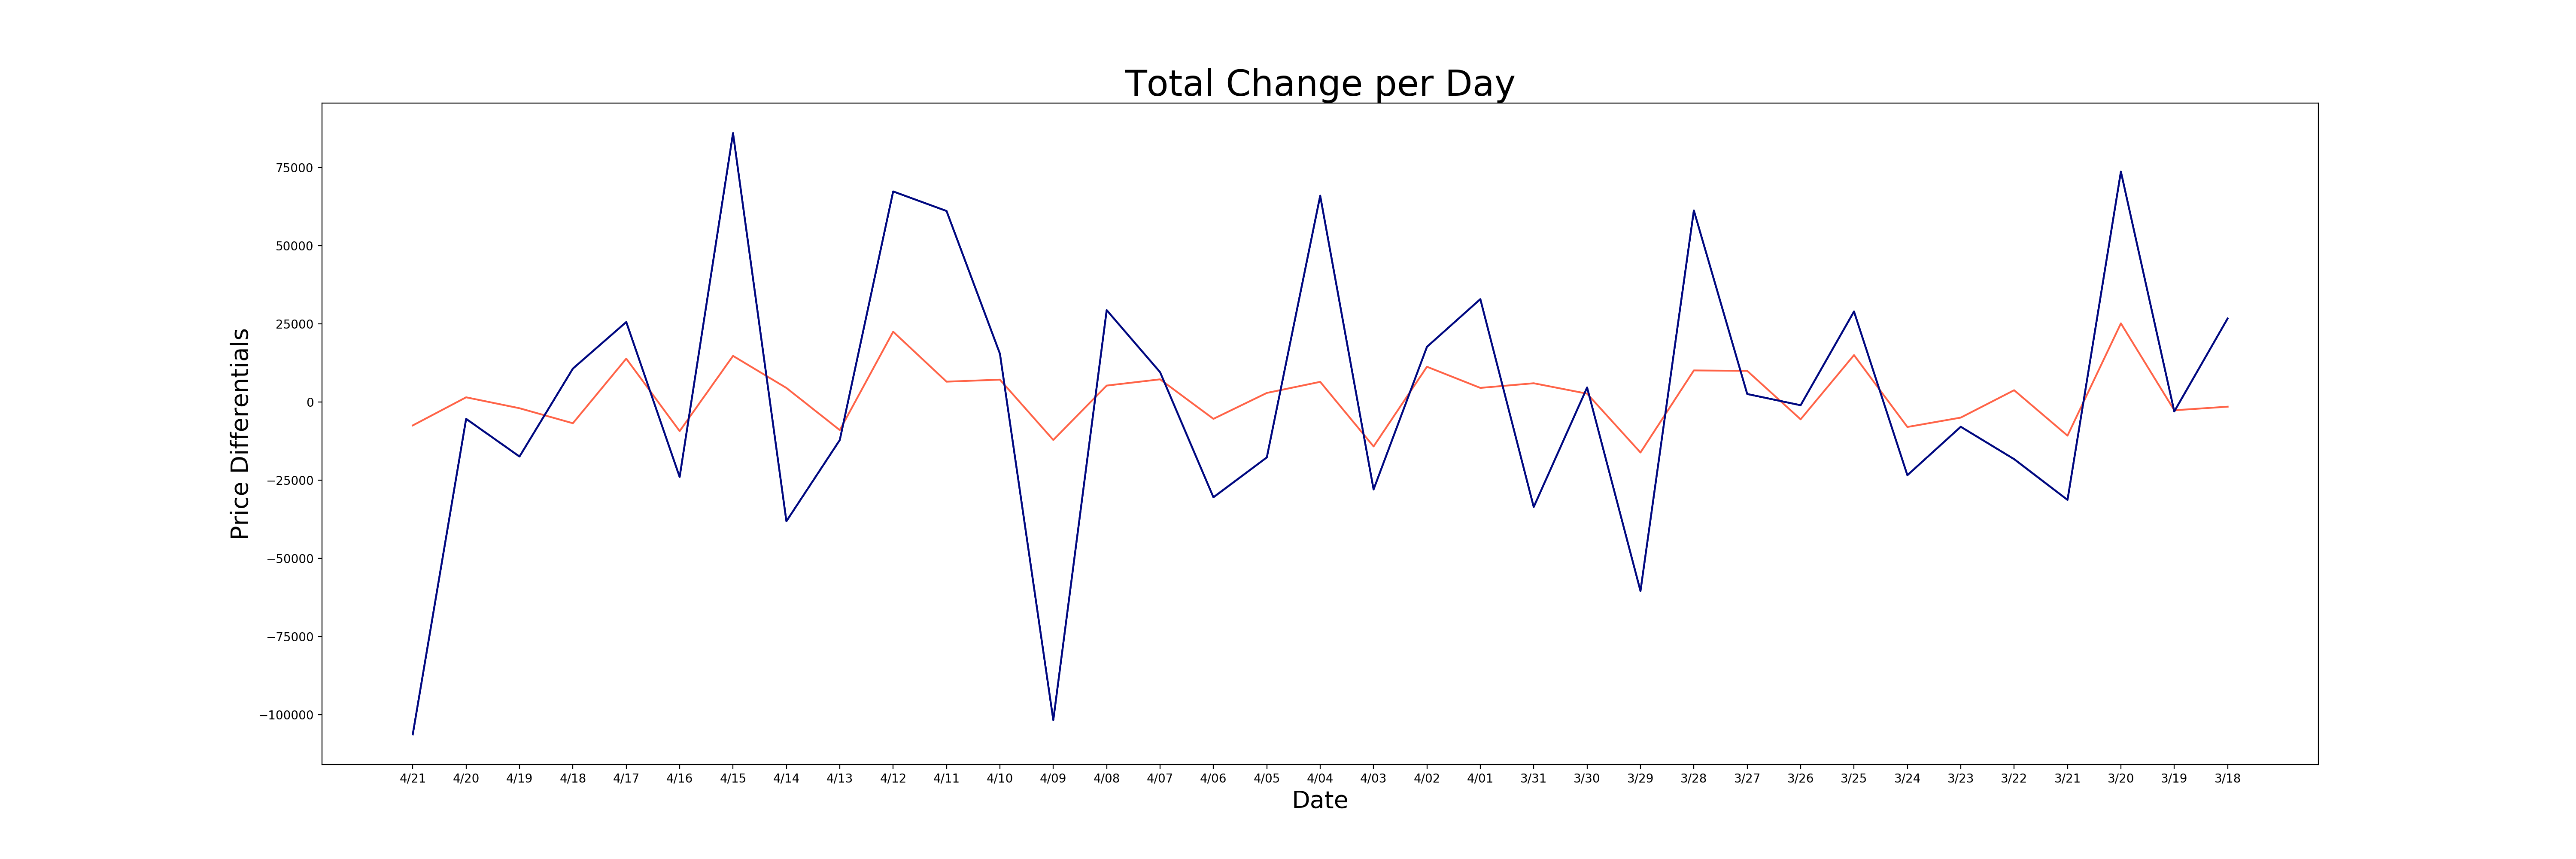

Text(0.5, 1.0, 'Mike Trout Price Differentials')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Price Differential')

In [40]:
fig = plt.figure()
plt.plot(trout.date, trout.Price_Differences, color='#FF6347')
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Mike Trout Price Differentials")
plt.xlabel("Day")
plt.ylabel("Price Differential")
plt.savefig("Trout Price Differentials.png")

Text(0.5, 1.0, 'Player Price Differentials')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Price Differential')

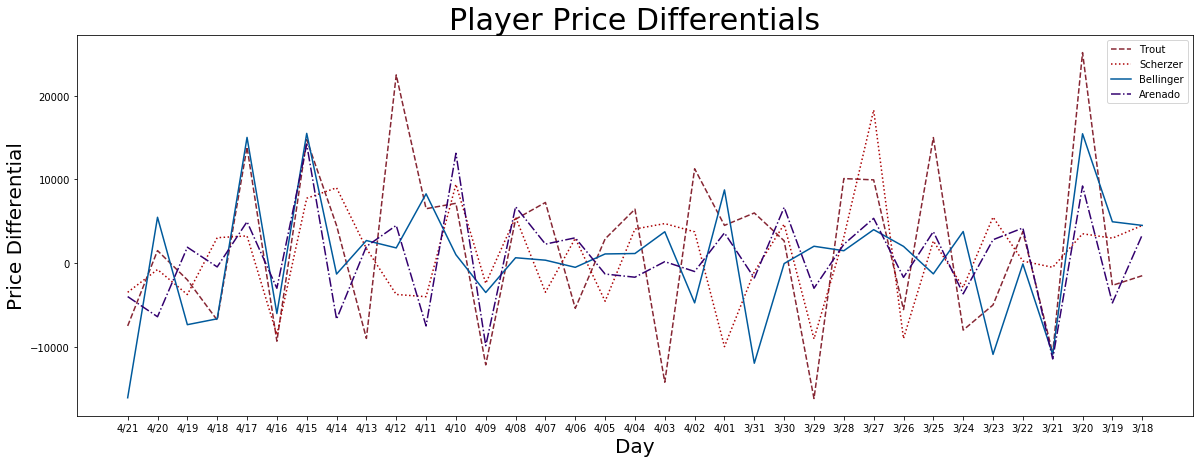

In [19]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(7)
ax = fig.add_subplot(1,1,1)
ax.plot(trout.date, trout.Price_Differences, color='#862633', linestyle="--", label="Trout")
ax.plot(scherzer.date, scherzer.Price_Differences, color='#AB0003', linestyle=":", label="Scherzer")
ax.plot(bellinger.date, bellinger.Price_Differences, color='#005A9C', linestyle="-", label="Bellinger")
ax.plot(arenado.date, arenado.Price_Differences, color='#33006f', linestyle="-.", label="Arenado")
ax.set_title("Player Price Differentials", fontsize=30)
ax.set_xlabel("Day", fontsize=20)
ax.set_ylabel("Price Differential", fontsize=20)
ax.legend(loc='best')
fig.savefig("Top 4 Player Differentials.png")

<IPython.core.display.Javascript object>


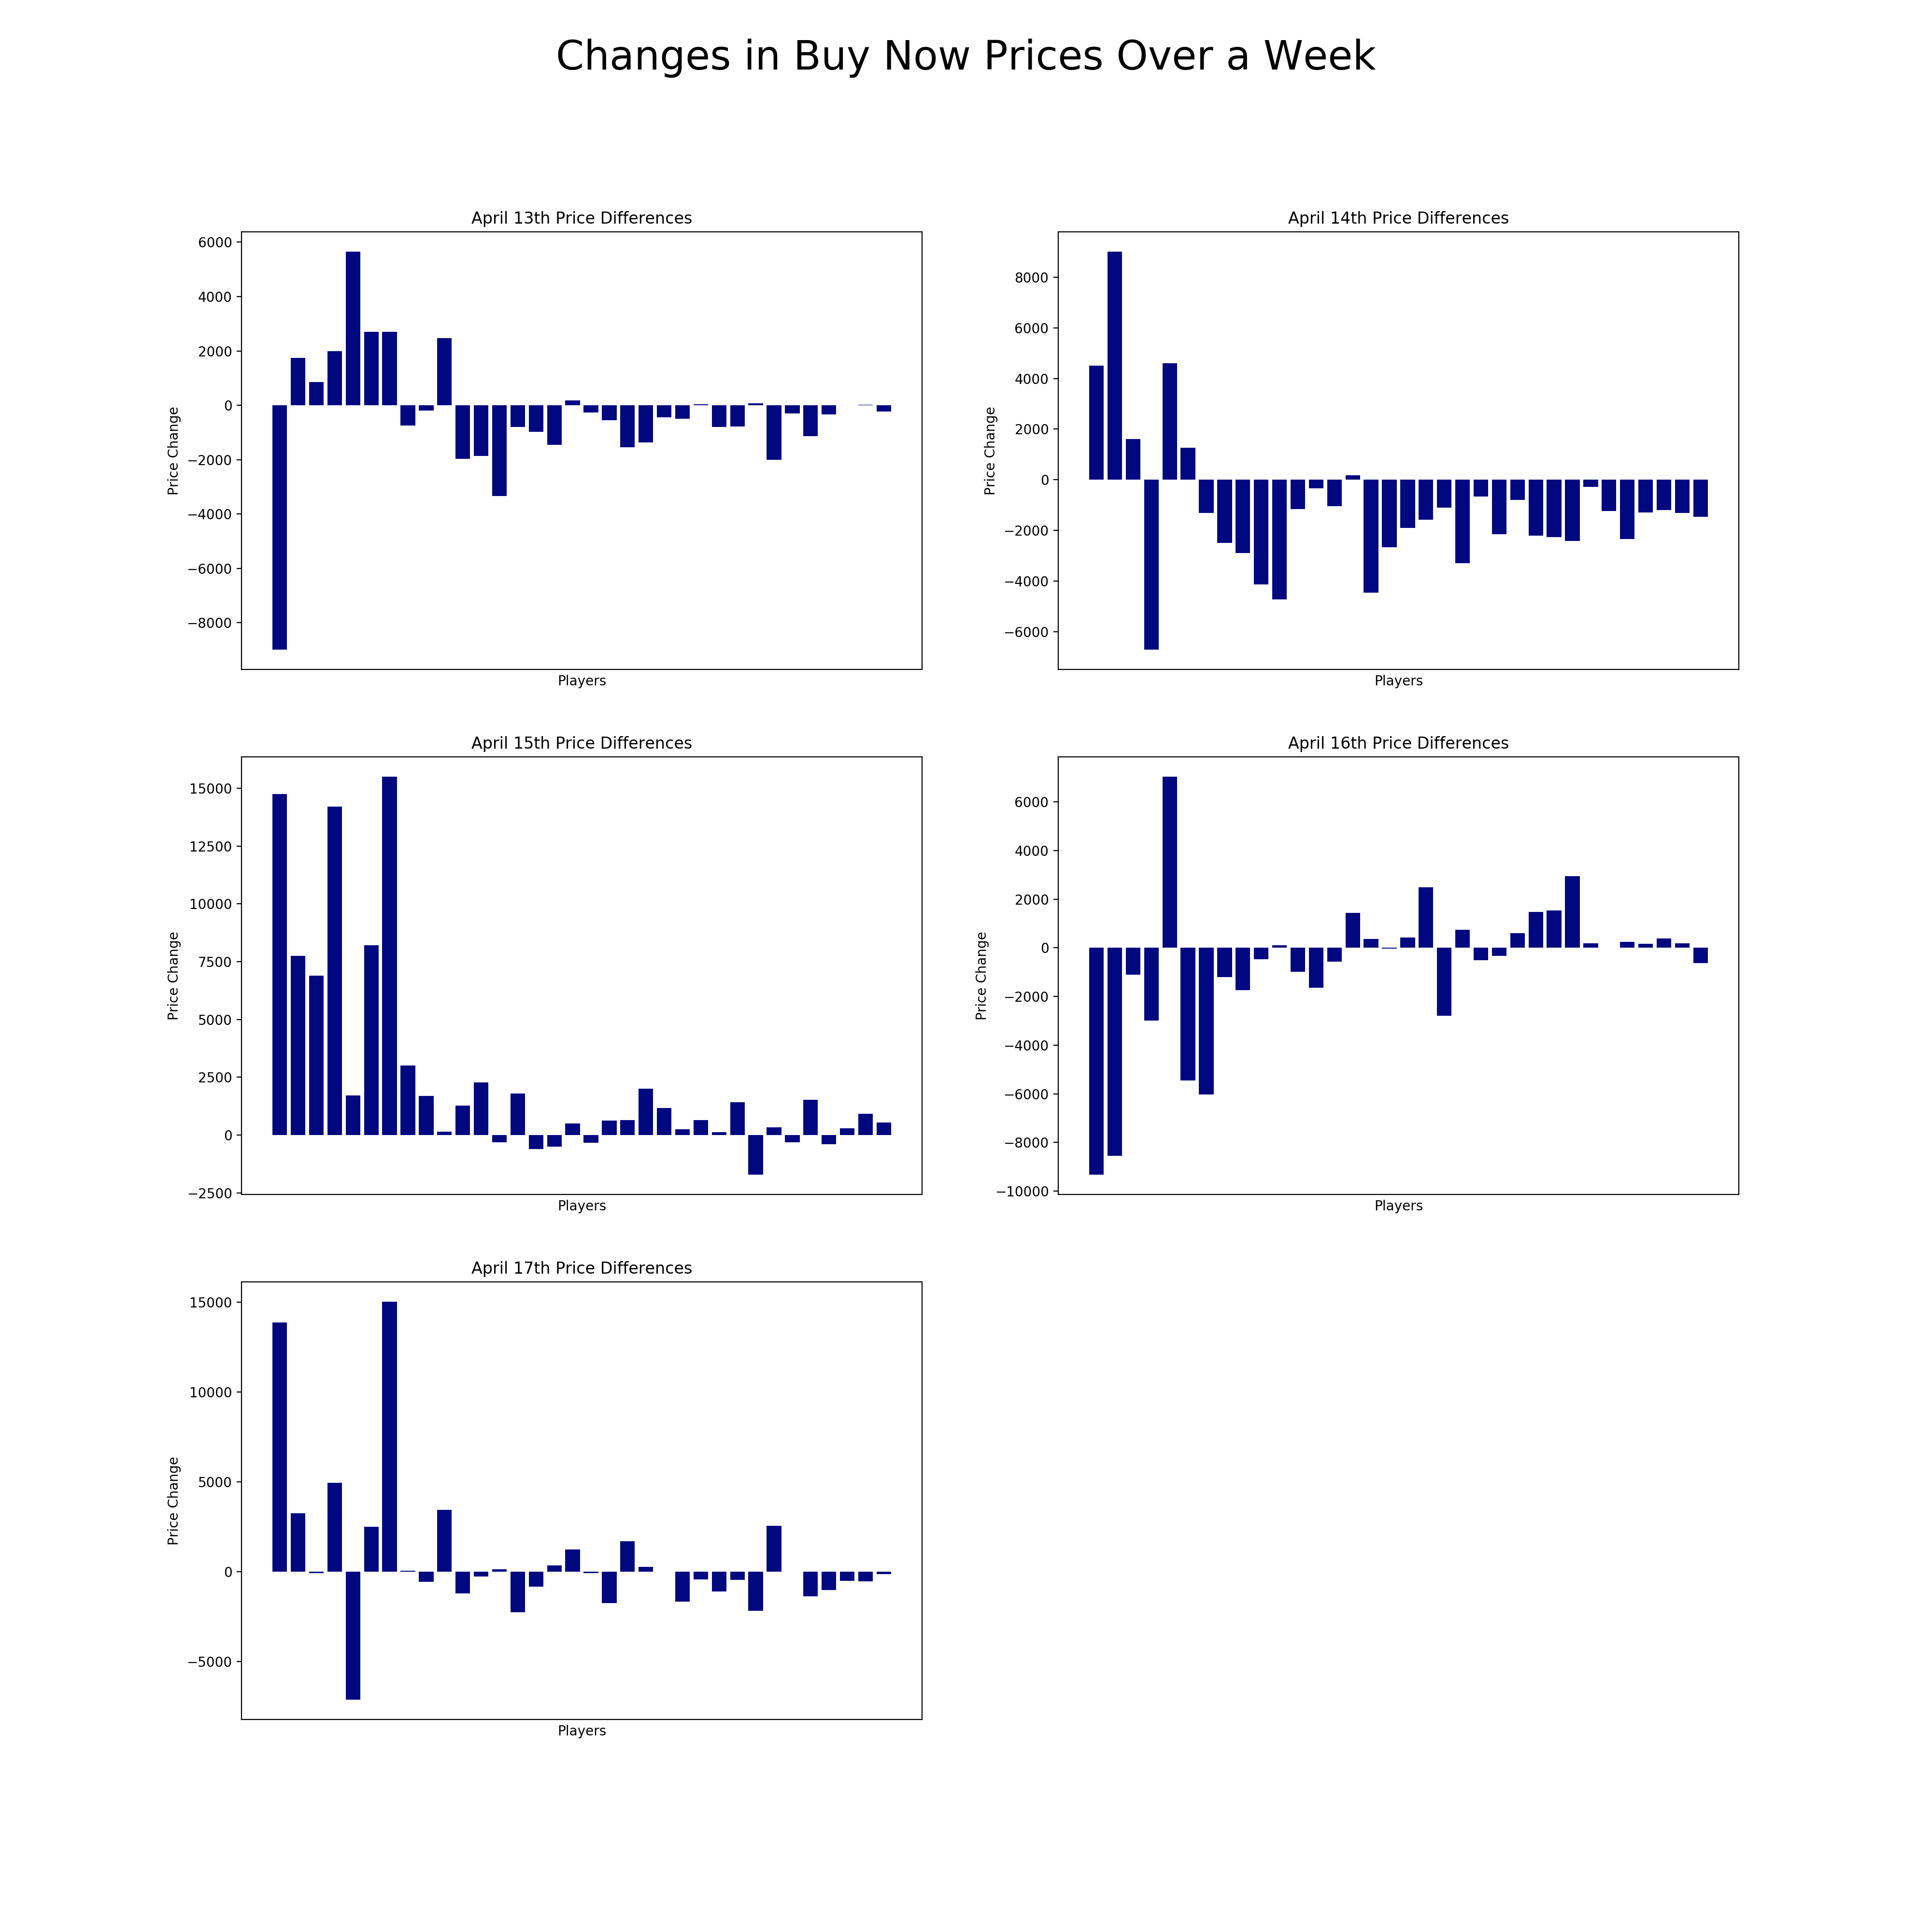

Text(0.5, 0.98, 'Changes in Buy Now Prices Over a Week')

Text(0.5, 1.0, 'April 13th Price Differences')

Text(0.5, 0, 'Players')

Text(0, 0.5, 'Price Change')

<BarContainer object of 34 artists>

[]

Text(0.5, 1.0, 'April 14th Price Differences')

Text(0.5, 0, 'Players')

Text(0, 0.5, 'Price Change')

<BarContainer object of 34 artists>

[]

Text(0.5, 1.0, 'April 15th Price Differences')

Text(0.5, 0, 'Players')

Text(0, 0.5, 'Price Change')

<BarContainer object of 34 artists>

[]

Text(0.5, 1.0, 'April 16th Price Differences')

Text(0.5, 0, 'Players')

Text(0, 0.5, 'Price Change')

<BarContainer object of 34 artists>

[]

Text(0.5, 1.0, 'April 17th Price Differences')

Text(0.5, 0, 'Players')

Text(0, 0.5, 'Price Change')

<BarContainer object of 34 artists>

[]

In [32]:
fig = plt.figure()
fig.suptitle("Changes in Buy Now Prices Over a Week", fontsize=30)
ax1 = fig.add_subplot(3,2,1)
ax1.set_title("April 13th Price Differences")
ax1.set_xlabel("Players")
ax1.set_ylabel("Price Change")
ax1.bar(april13.player, april13.Price_Differences, color='#000880')
ax1.axes.get_xaxis().set_ticks([])
ax2 = fig.add_subplot(3,2,2)
ax2.set_title("April 14th Price Differences")
ax2.set_xlabel("Players")
ax2.set_ylabel("Price Change")
ax2.bar(april14.player, april14.Price_Differences, color='#000880')
ax2.axes.get_xaxis().set_ticks([])
ax3 = fig.add_subplot(3,2,3)
ax3.set_title("April 15th Price Differences")
ax3.set_xlabel("Players")
ax3.set_ylabel("Price Change")
ax3.bar(april15.player, april15.Price_Differences, color='#000880')
ax3.axes.get_xaxis().set_ticks([])
ax4 = fig.add_subplot(3,2,4)
ax4.set_title("April 16th Price Differences")
ax4.set_xlabel("Players")
ax4.set_ylabel("Price Change")
ax4.bar(april16.player, april16.Price_Differences, color='#000880')
ax4.axes.get_xaxis().set_ticks([])
ax5 = fig.add_subplot(3,2,5)
ax5.set_title("April 17th Price Differences")
ax5.set_xlabel("Players")
ax5.set_ylabel("Price Change")
ax5.bar(april17.player, april17.Price_Differences, color='#000880')
ax5.axes.get_xaxis().set_ticks([])
fig.set_figwidth(20)
fig.set_figheight(20)
fig.savefig("Change in Buy Now Prices Over the Week")

Player's Name Mike Trout


<IPython.core.display.Javascript object>


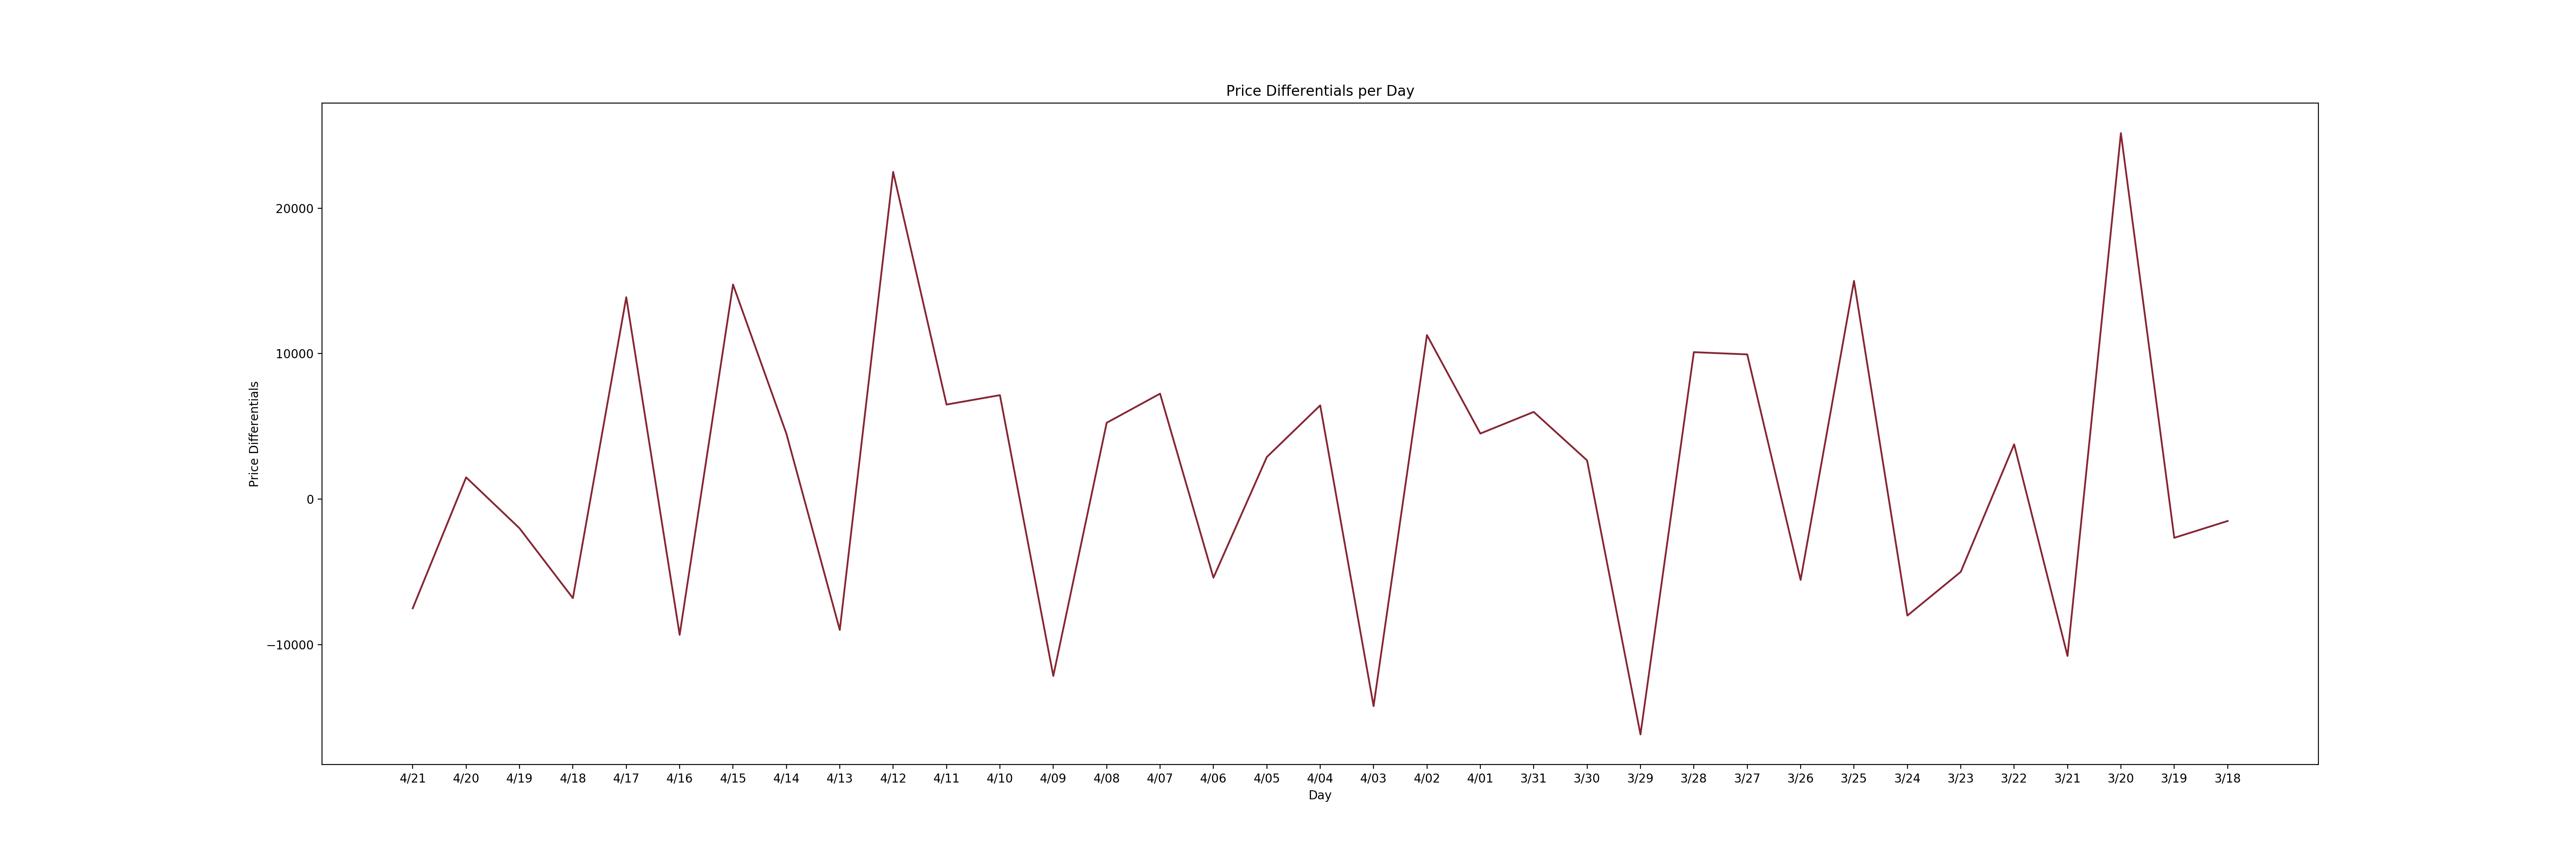

Text(0.5, 1.0, 'Price Differentials per Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Price Differentials')

Here are Mike Trout's price differentials from 3/18 to 4/21:


In [50]:
player_name = input("Player's Name ")
df = (prices.loc[prices['player'] == player_name])
fig = plt.figure()
plt.plot(df.date, df.Price_Differences, color='#862633')
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Price Differentials per Day")
plt.xlabel("Day")
plt.ylabel("Price Differentials")
print("Here are " + player_name + "'s price differentials from 3/18 to 4/21:")

In [41]:
dategroups = prices[['date', 'Price_Differences']].groupby('date').sum()
dategroups

,Price_Differences
date,
3/18,26722.0
3/19,-3034.0
3/20,73699.0
3/21,-31313.0
3/22,-18289.0
3/23,-7927.0
3/24,-23425.0
3/25,28947.0
3/26,-1039.0


<IPython.core.display.Javascript object>


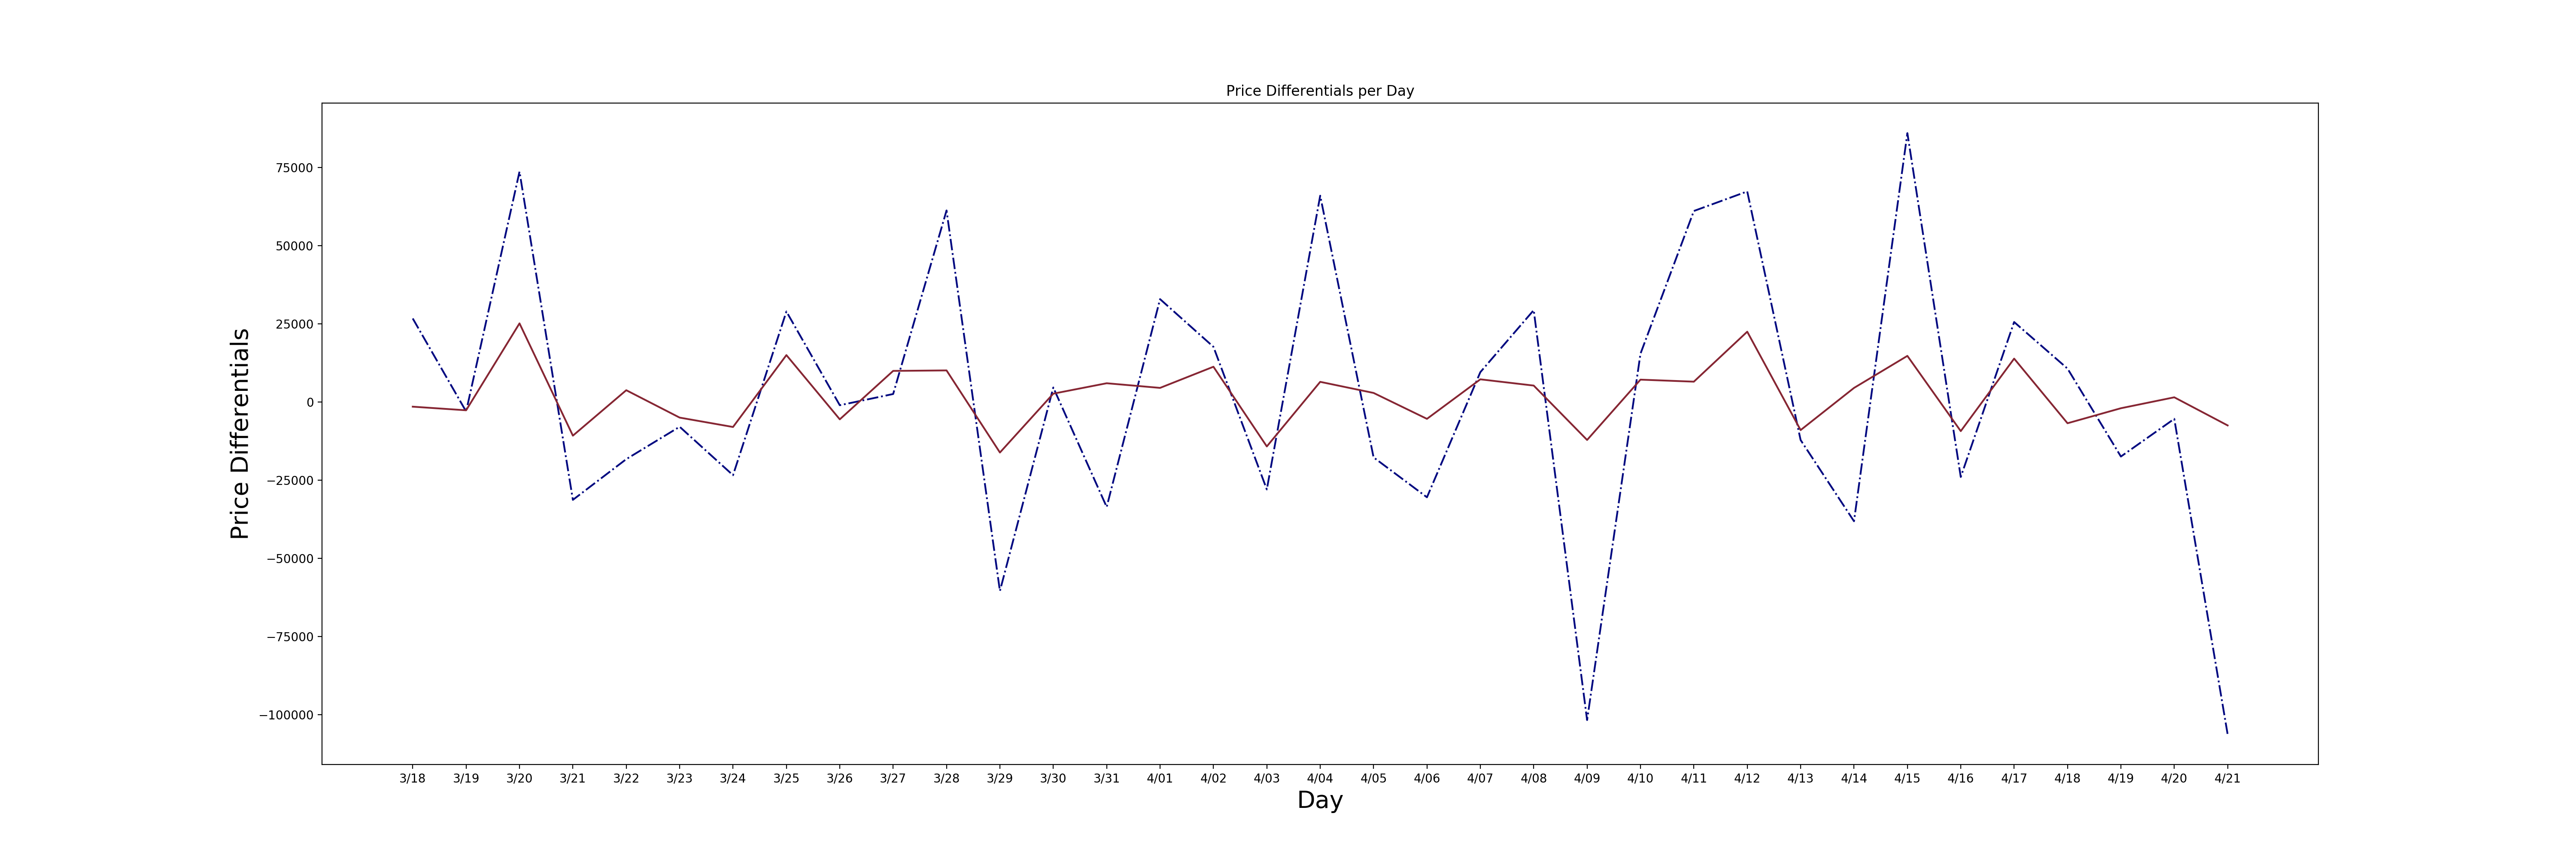

Text(0.5, 1.0, 'Total Change per Day')

Text(0, 0.5, 'Price Differentials')

Text(0.5, 0, 'Date')

In [47]:
fig = plt.figure()
plt.plot(dategroups, color='#000880', linestyle="-.")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Total Change per Day", fontsize=30)
plt.ylabel("Price Differentials", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.savefig("Total Price Differential.png")